In [1]:
import sys
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
sys.path.append('..')

In [4]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA, ConditionalPLSA

In [5]:
csv_file = '../data/Full-Economic-News-DFE-839861.csv'
directory = '../data/blogs'

In [6]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [27]:
pipeline.LemmatizeWords += 'VB'
pipeline.LemmatizeWords

LemmatizeWords:
('NN', 'VB')

where:
JJ ... adjectives
VB ... verbs
NN ... nouns
RB ... adverb

In [14]:
corpus = Corpus.from_xml(directory, pipeline)
corpus

Corpus:
Number of documents: 3103
Number of words:     15106

In [28]:
corpus = Corpus.from_csv(csv_file, pipeline)
corpus

Corpus:
Number of documents: 1000
Number of words:     8048

In [35]:
doc = 'consuming means eating'

In [37]:
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

In [29]:
n_topics = 5

In [ ]:
conditional_plsa = ConditionalPLSA(corpus, n_topics, False)
conditional_result = conditional_plsa.fit()
conditional_plsa

In [ ]:
visualize = Visualize(conditional_result)
visualize

In [30]:
plsa = PLSA(corpus, n_topics, True)
plsa_result = plsa.fit()
plsa

PLSA:
====
Number of topics:     5
Number of documents:  1000
Number of words:      8048
Number of iterations: 76

In [31]:
visualize = Visualize(plsa_result)
visualize

Visualize:
Number of topics:    5
Number of documents: 5
Number of words:     8048

<IPython.core.display.Javascript object>


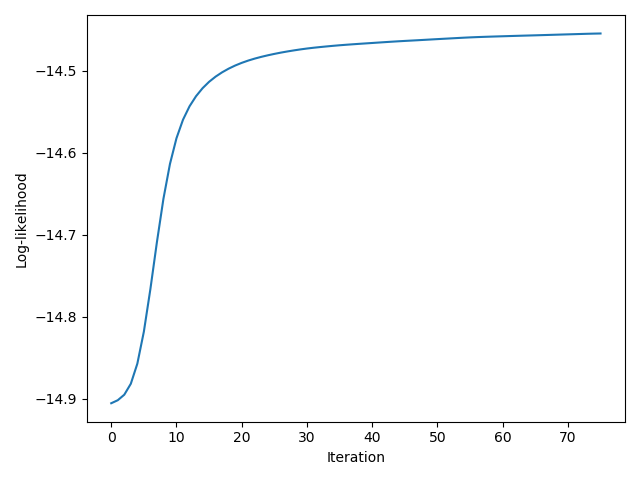

In [32]:
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

<IPython.core.display.Javascript object>


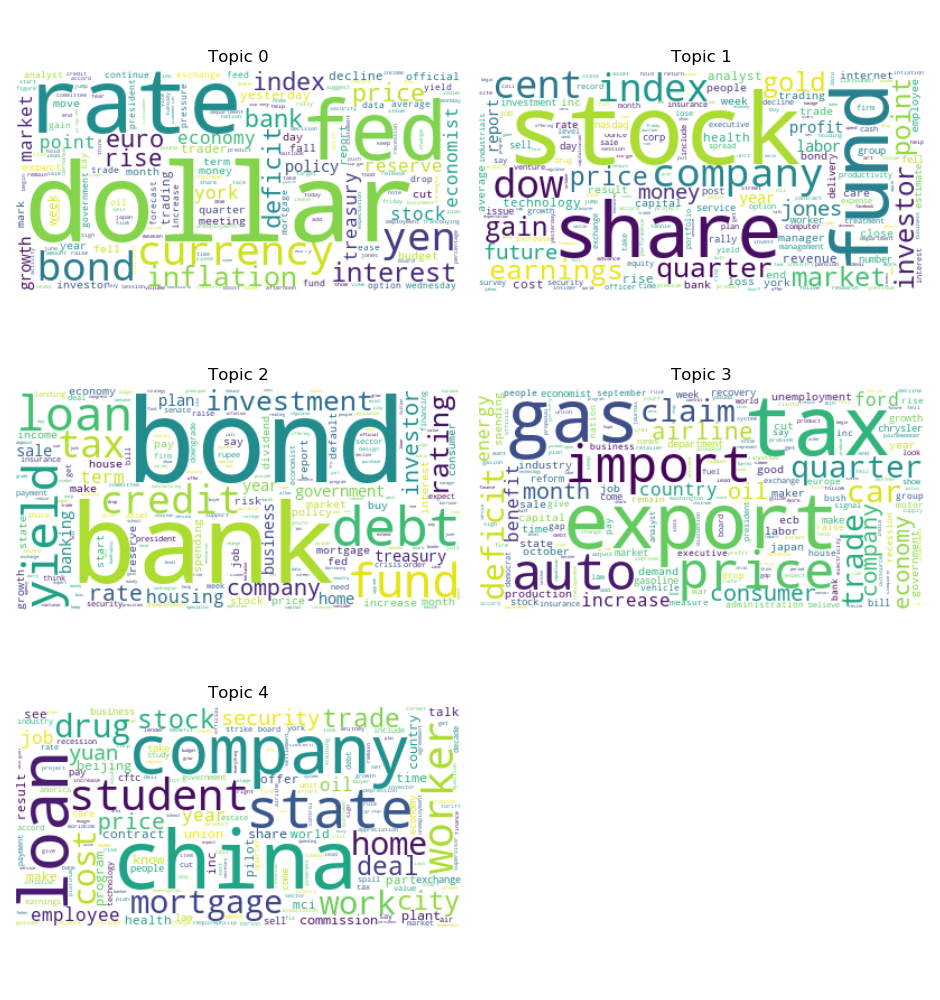

In [33]:
fig = plt.figure(figsize=(9.4, 10))
visualize.wordclouds(fig)

In [ ]:
fig = plt.figure(figsize=(9.4, 6))
visualize.wordclouds(fig)

<IPython.core.display.Javascript object>


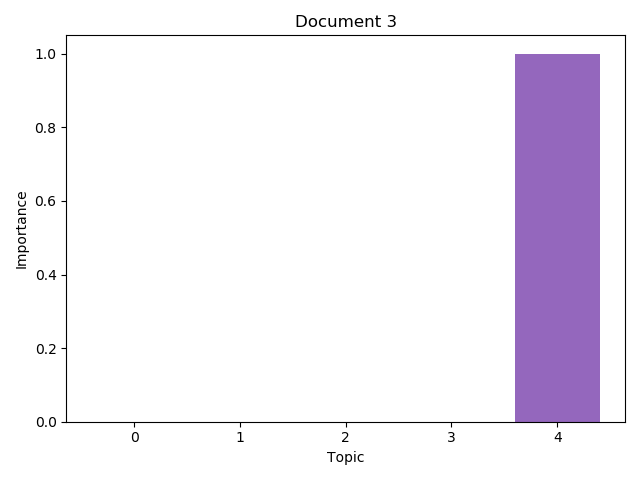

In [13]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(3, ax)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

In [38]:
plsa_result.word_given_topic[0]

(('dollar', 0.010169676145724003),
 ('rate', 0.007560384317909184),
 ('fed', 0.006134652537145134),
 ('currency', 0.0056977680514800864),
 ('bond', 0.005522532774998285),
 ('yen', 0.0054314666921125585),
 ('inflation', 0.005331077200025724),
 ('interest', 0.004806884834696037),
 ('bank', 0.004142664737286448),
 ('price', 0.004039796964397002),
 ('euro', 0.003996707633747907),
 ('deficit', 0.00399079787776405),
 ('index', 0.003925130819218598),
 ('rise', 0.003639014720607055),
 ('economy', 0.0036036675854709973),
 ('treasury', 0.003501632107132349),
 ('reserve', 0.0034221464551320675),
 ('stock', 0.0033963755783190013),
 ('point', 0.003375394215044349),
 ('york', 0.003250686241964996),
 ('economist', 0.00321398439134588),
 ('market', 0.0031960814931798753),
 ('policy', 0.003188448446104158),
 ('growth', 0.0031655671762843823),
 ('yesterday', 0.0031644848462067405),
 ('trading', 0.0031150066204643995),
 ('trader', 0.003074583250310206),
 ('week', 0.0028581825853383025),
 ('decline', 0.00